In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import os

import libpysal as lps
import pysal.explore as ps_explore
import pysal.model as ps_model
from splot.esda import moran_facet,moran_scatterplot,lisa_cluster,plot_local_autocorrelation,plot_moran

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/opt/anaconda3/envs/TransAndGeoMac/lib/python3.10/site-packages/spaghetti/network.py:41: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(dep_msg, FutureWarning, stacklevel=1)
/opt/anaconda3/envs/TransAndGeoMac/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Test

In [3]:
basic_emissions_h3Res10_gdf = gpd.read_file(r'../../../../data/clean/freightEmissions/shp/stats/Basic_stats_h3Res10.geojson')
basic_emissions_h3Res10_gdf

,h3_index,CO_mean,CO_median,SO2_mean,SO2_median,NOx_mean,NOx_median,NO2_mean,NO2_median,PM2_5_mean,...,link_length,network_density,mean_distance,median_distance,depot_count,degree_centrality,closeness,eigenvector,betweeness,geometry
0,8a1fa47ae9b7fff,0.200103,0.218949,0.000248,0.000269,0.009202,0.009978,0.000460,0.000499,0.001733,...,0.567056,43.506402,1.785739,1.561289,0,7.918299,25.380420,7.729367e-73,3125.386126,"POLYGON ((173981.036 173422.746, 173965.942 17..."
1,8a1fa47a0257fff,0.100403,0.085247,0.000180,0.000153,0.007097,0.006025,0.000355,0.000301,0.001357,...,0.353569,27.135869,1.720358,1.507229,0,NaN,NaN,NaN,136.364777,"POLYGON ((172113.226 173719.711, 172098.127 17..."
2,8a1fa47a1887fff,3.945672,3.526850,0.000255,0.000234,0.251416,0.224234,0.012571,0.011212,0.001286,...,0.690478,52.997329,1.307548,1.109588,0,14.344235,25.346493,8.712152e-89,364.220758,"POLYGON ((172911.124 174813.711, 172896.028 17..."
3,8a1fa47a02effff,2.856087,3.561936,0.000383,0.000378,0.183859,0.228690,0.009193,0.011435,0.002542,...,1.024558,78.631154,1.744805,1.562622,0,15.900974,23.022224,6.056389e-33,58.485672,"POLYGON ((172151.554 173608.968, 172136.454 17..."
4,8a1fa47124f7fff,0.204622,0.151654,0.000327,0.000239,0.013164,0.009336,0.000658,0.000467,0.002344,...,1.660887,127.483592,1.616501,1.457916,0,16.679343,24.607378,4.074439e-06,1566.740173,"POLYGON ((173702.040 175587.892, 173686.947 17..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,8a1fa47a0acffff,0.074471,0.074471,0.000149,0.000149,0.027332,0.027332,0.001367,0.001367,0.000908,...,0.585219,44.920300,1.690654,1.598294,0,12.109203,23.629645,8.236270e-67,45.178812,"POLYGON ((171921.597 174273.394, 171906.498 17..."
460,8a1fa47a0347fff,0.151452,0.151452,0.000247,0.000247,0.009505,0.009505,0.000475,0.000475,0.001799,...,0.549267,42.158566,1.685914,1.381654,0,14.066246,24.031624,8.097362e-60,963.341374,"POLYGON ((171998.247 174051.927, 171983.148 17..."
461,8a1fa47a0377fff,0.064061,0.064061,0.000092,0.000092,0.003350,0.003350,0.000167,0.000167,0.000624,...,0.672172,51.593116,1.756919,1.476504,0,17.124125,24.039998,9.749015e-62,2119.821135,"POLYGON ((171876.300 174064.337, 171861.200 17..."
462,8a1fa47a035ffff,0.085395,0.085395,0.000153,0.000153,0.006036,0.006036,0.000302,0.000302,0.001154,...,0.000000,0.000000,1.691482,1.324674,0,NaN,NaN,NaN,NaN,"POLYGON ((172036.573 173941.190, 172021.473 17..."


In [4]:
basic_emissions_h3Res10_gdf.columns

Index(['h3_index', 'CO_mean', 'CO_median', 'SO2_mean', 'SO2_median',
       'NOx_mean', 'NOx_median', 'NO2_mean', 'NO2_median', 'PM2_5_mean',
       'PM2_5_median', 'PM_mean', 'PM_median', 'PM_non_exhaust_mean',
       'PM_non_exhaust_median', 'air_quality_pollutants_mean',
       'air_quality_pollutants_median', 'EPI_mean', 'EPI_median',
       'weighted_AQI_mean', 'weighted_AQI_median', 'link_count', 'node_count',
       'intersection_count', 'intersections_ratio', 'area', 'link_length',
       'network_density', 'mean_distance', 'median_distance', 'depot_count',
       'degree_centrality', 'closeness', 'eigenvector', 'betweeness',
       'geometry'],
      dtype='object')

## Test on Moran I

In [5]:
spatial_weights = lps.weights.Queen.from_dataframe(basic_emissions_h3Res10_gdf)
spatial_weights.transform = 'r'
spatial_weights

/var/folders/y9/y0gddk2s3s3gl_8567n1mwnh0000gn/T/ipykernel_3047/1885857296.py:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  spatial_weights = lps.weights.Queen.from_dataframe(basic_emissions_h3Res10_gdf)


In [7]:
moran_I = ps_explore.esda.Moran(basic_emissions_h3Res10_gdf['EPI_mean'], spatial_weights)
moran_I

In [8]:
print(f"Moran's I: {moran_I.I}")
print(f'P-Value (normality) {moran_I.p_norm}')
print(f"P-value (randomization): {moran_I.p_rand}")
print(f"P-value (permutation): {moran_I.p_sim}")
print(f"Z-score (normality assumption): {moran_I.z_norm}")
print(f"Z-score (randomization assumption): {moran_I.z_rand}")
print(f"Z-score (permutation test): {moran_I.z_sim}")

Moran's I: 0.4048769279215233
P-Value (normality) 1.1590766543062593e-44
P-value (randomization): 4.368086683209559e-45
P-value (permutation): 0.001
Z-score (normality assumption): 14.021037517653294
Z-score (randomization assumption): 14.090121625711182
Z-score (permutation test): 14.239476547536594


(<Figure size 1000x400 with 2 Axes>,
 array([<Axes: title={'center': 'Reference Distribution'}, xlabel='Moran I: 0.4', ylabel='Density'>,
        <Axes: title={'center': 'Moran Scatterplot (0.4)'}, xlabel='Attribute', ylabel='Spatial Lag'>],
       dtype=object))

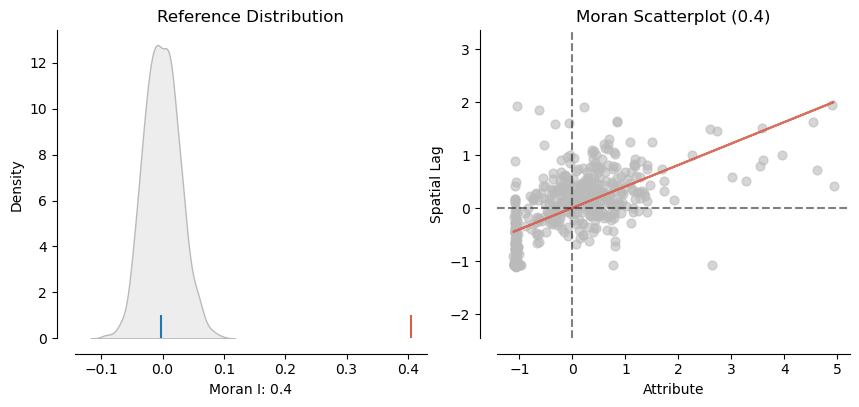

In [9]:
plot_moran(moran_I)

### Local Moran I

In [11]:
lisa = ps_explore.esda.Moran_Local(basic_emissions_h3Res10_gdf['EPI_mean'], spatial_weights)
lisa

In [12]:
print(f"Local Moran's I: {lisa.Is}")  # 每个单元的局部莫兰指数
print(f"P-values: {lisa.p_sim}")      # 置换检验的 P 值

Local Moran's I: [ 4.97887759e-01 -5.40474923e-01  3.78873334e-01  1.82177481e-02
  7.47109936e-01 -3.58288280e-02  4.28139499e-01  3.88011956e-01
  1.26707151e-01 -3.86171769e-02  8.17710310e-01 -1.03253529e-01
  3.74520778e-02 -1.06583660e-01 -2.02904408e-02  1.71670315e-01
  7.81505269e-01  1.56586261e-01  7.18294204e-01  1.27108408e+00
 -2.63341132e-01 -3.24214664e-03  2.49445606e-01 -1.03998016e-01
 -1.24535032e-01 -1.10729012e-01 -2.87504884e-02 -2.22021621e-02
  3.72095342e-01  6.80361493e-02  3.31370356e-01  1.34355423e-01
 -9.42291698e-02  9.17116772e-04  1.81771129e-01 -2.86958052e-02
  3.97995697e+00  2.28820685e+00 -9.65914860e-02  9.36722115e-01
  2.55072966e-01  4.10016790e-02  1.17757953e-02  5.76788277e-01
  1.16634855e+00  3.59315803e-01  6.91015432e-02  1.98783427e-02
  1.95178119e-01 -5.94248474e-02 -6.95426926e-02  3.28373313e+00
  5.71966059e-01  1.84875161e-02 -6.26557373e-02 -2.00448841e-01
 -3.25361468e-01 -1.03868691e-02 -1.75738154e-01 -1.80015201e-01
 -3.0335

In [18]:
lisa.q

array([3, 2, 1, 1, 3, 2, 1, 1, 3, 2, 1, 2, 1, 2, 2, 3, 3, 1, 3, 1, 4, 2,
       1, 2, 2, 2, 4, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 4, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 4, 4, 1, 1, 1, 2, 2, 4, 4, 4, 2, 4, 2, 4, 1, 1, 3,
       1, 1, 1, 3, 4, 1, 1, 3, 2, 1, 3, 1, 1, 1, 4, 1, 1, 3, 2, 2, 2, 1,
       1, 1, 3, 2, 1, 1, 2, 1, 1, 1, 1, 3, 3, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 2, 1, 4, 1, 2, 1, 1, 2, 1, 4, 4, 3, 1, 3, 1, 4, 2, 4, 4, 4,
       1, 1, 1, 1, 2, 1, 1, 3, 1, 3, 4, 4, 1, 1, 2, 4, 1, 4, 3, 1, 1, 2,
       3, 1, 1, 2, 3, 3, 1, 1, 2, 1, 3, 1, 3, 3, 2, 1, 1, 3, 1, 3, 2, 1,
       3, 1, 2, 1, 1, 2, 3, 1, 1, 2, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 4,
       1, 1, 2, 2, 1, 1, 2, 2, 3, 3, 1, 1, 1, 1, 2, 1, 1, 4, 4, 3, 1, 1,
       1, 1, 1, 3, 3, 4, 1, 3, 1, 1, 4, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1,
       4, 3, 3, 1, 4, 3, 1, 1, 1, 4, 2, 1, 1, 1, 3, 1, 2, 2, 2, 1, 4, 3,
       3, 1, 1, 1, 1, 3, 3, 3, 3, 4, 1, 1, 3, 3, 2, 4, 1, 1, 1, 2, 2, 4,
       4, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 2,

In [16]:
lisa.get_cluster_labels()

array(['Insignificant', 'Insignificant', 'High-High', 'Insignificant',
       'Low-Low', 'Insignificant', 'High-High', 'Insignificant',
       'Insignificant', 'Insignificant', 'High-High', 'Insignificant',
       'Insignificant', 'Insignificant', 'Insignificant', 'Insignificant',
       'Low-Low', 'Insignificant', 'Low-Low', 'High-High',
       'Insignificant', 'Insignificant', 'High-High', 'Insignificant',
       'Insignificant', 'Low-High', 'Insignificant', 'Insignificant',
       'Insignificant', 'Insignificant', 'Insignificant', 'Insignificant',
       'Insignificant', 'Insignificant', 'Insignificant', 'Insignificant',
       'High-High', 'High-High', 'Insignificant', 'High-High',
       'Insignificant', 'Insignificant', 'Insignificant', 'Insignificant',
       'High-High', 'High-High', 'Insignificant', 'Insignificant',
       'Insignificant', 'Insignificant', 'Insignificant', 'High-High',
       'High-High', 'Insignificant', 'Insignificant', 'Insignificant',
       'Insignificant

(<Figure size 900x900 with 1 Axes>, <Axes: >)

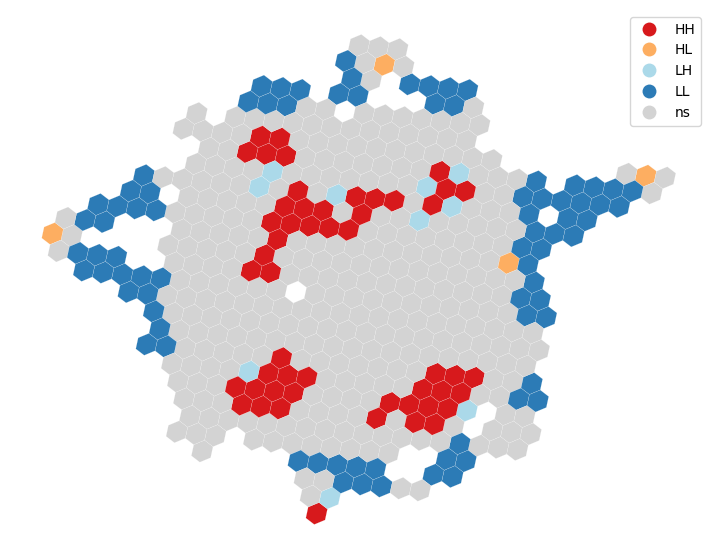

In [13]:
lisa_cluster(lisa, basic_emissions_h3Res10_gdf, p=0.05, figsize=(9, 9))

(<Figure size 1500x400 with 3 Axes>,
 array([<Axes: title={'center': 'Moran Local Scatterplot'}, xlabel='Attribute', ylabel='Spatial Lag'>,
        <Axes: >, <Axes: >], dtype=object))

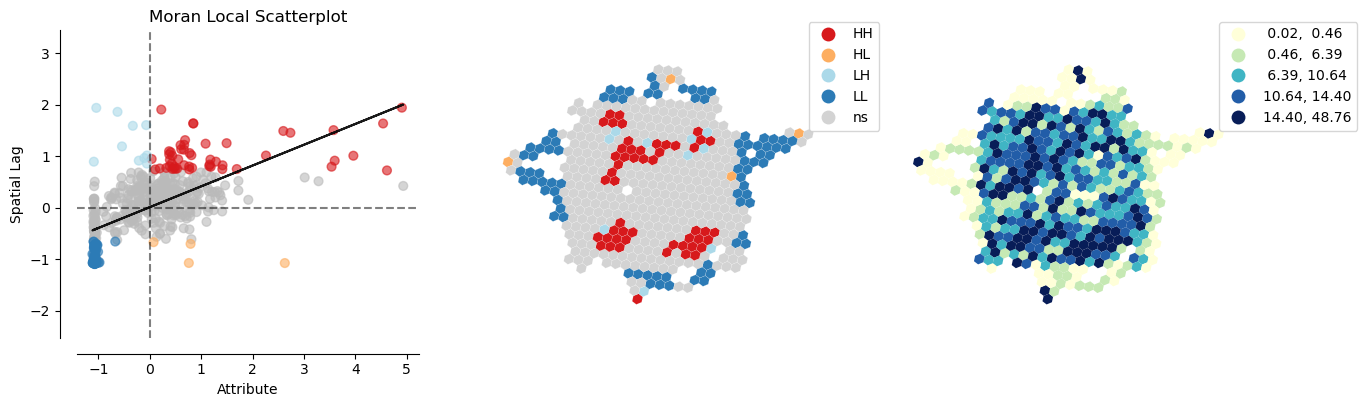

In [14]:
plot_local_autocorrelation(lisa, basic_emissions_h3Res10_gdf, 'EPI_mean')

## GWR

In [19]:
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW

In [21]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [28]:
filled_data = basic_emissions_h3Res10_gdf.fillna(0)

In [39]:
Y = filled_data['EPI_mean'].values.reshape((-1, 1))
X_raw = filled_data[[ 
                                 'intersection_count', 
                                #  'intersections_ratio', 
                                 'network_density', 
                                 'mean_distance', 
                                #  'median_distance', 
                                 'depot_count',
                                 'degree_centrality', 
                                 'closeness', 
                                 'eigenvector', 
                                 'betweeness']].values


In [40]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

In [41]:
X_with_const = sm.add_constant(X_scaled)

In [42]:
ols_model = sm.OLS(Y, X_with_const).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     61.36
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           1.41e-67
Time:                        18:19:00   Log-Likelihood:                -1457.1
No. Observations:                 464   AIC:                             2932.
Df Residuals:                     455   BIC:                             2969.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0062      0.262     34.353      0.0

In [34]:

# ---------- VIF 检验 ----------
# 计算 VIF：说明每个变量是否与其它变量高度相关
X_raw_df = pd.DataFrame(X_raw, columns=[
	'intersections_ratio', 
	'network_density', 
	'mean_distance', 'median_distance', 
	'depot_count',
	'degree_centrality', 
	'closeness', 
	'eigenvector', 
	'betweeness'
])
vif_data = pd.DataFrame()
vif_data['Variable'] = ['Intercept'] + list(X_raw_df.columns)
vif_data['VIF'] = [variance_inflation_factor(X_with_const, i) for i in range(X_with_const.shape[1])]

print("\n🔍 VIF（方差膨胀因子）:")
print(vif_data)


🔍 VIF（方差膨胀因子）:
              Variable       VIF
0            Intercept  1.000000
1  intersections_ratio  2.218300
2      network_density  1.323537
3        mean_distance  2.722602
4      median_distance  2.745082
5          depot_count  1.161410
6    degree_centrality  3.234720
7            closeness  1.945742
8          eigenvector  1.159904
9           betweeness  1.193199
